<a href="https://colab.research.google.com/github/VISHVAPRASATHVS/clustering/blob/main/mall_customer_clustering_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
x = df.drop(['CustomerID','Genre'],axis = 1)
x.head()

,Age,Annual_Income_(k$),Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

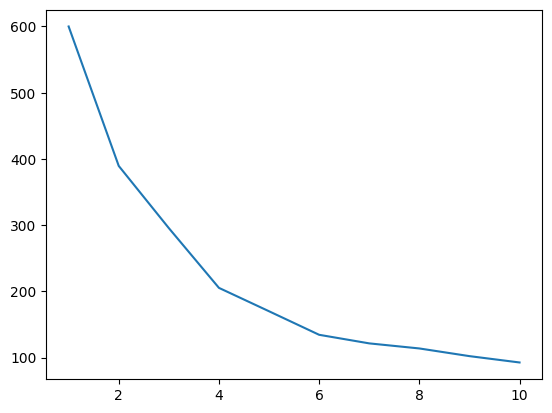

In [7]:
wcss = []
for k in range(1,11):
  temp_model = KMeans(n_clusters = k,init='k-means++',random_state = 42)
  temp_model.fit(x_scaled)
  wcss.append(temp_model.inertia_)
plt.plot(range(1,11),wcss)

In [8]:
model = KMeans(n_clusters = 5,init = 'k-means++',random_state = 42)
model.fit(x_scaled)

KMeans(n_clusters=5, random_state=42)

In [9]:
df['cluster'] = model.predict(x_scaled)
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,2


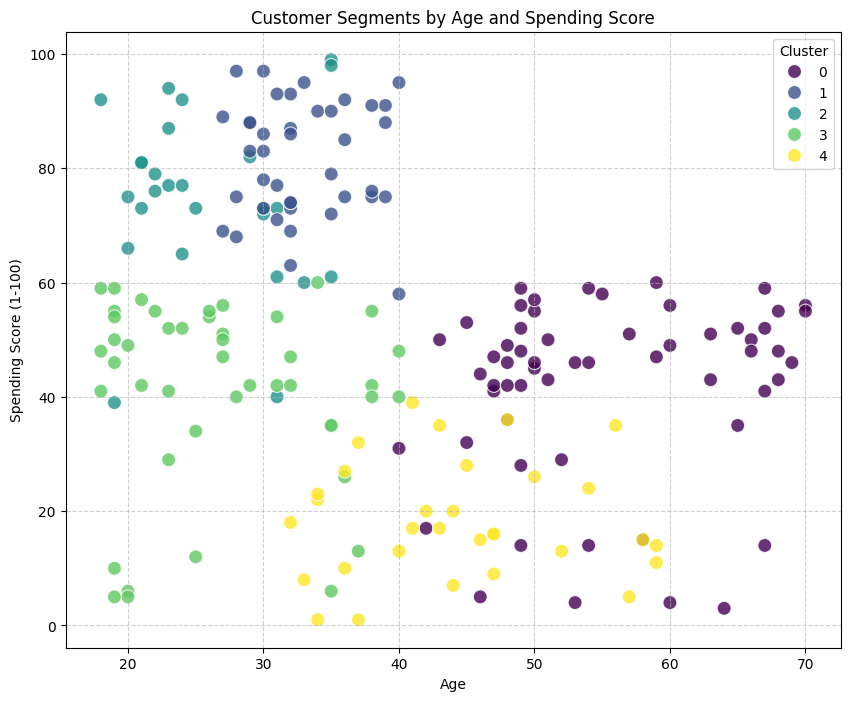

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segments by Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster')
plt.show()